<a href="https://colab.research.google.com/github/harnalashok/LLMs/blob/main/gpu_nvidia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# LAst amended: 7th April, 2024

In [ ]:
# Check ubuntu release
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy


## Watch GPU activity continuously
[StackOverflow here](https://stackoverflow.com/a/8225492/3282777)       

On linux one can watch GPU utilization continuously, as:    

`$ nvidia-smi -q -g 0 -d UTILIZATION -l`    

Or use this command:       

`$ watch -n 0.5 nvidia-smi`      

OR, use this command:      

`$ nvidia-smi -l 1 `


## What is cuda?
See [here](https://docs.nvidia.com/deploy/cuda-compatibility/index.html)    
More details about cuda 12.4 are [here](https://docs.nvidia.com/cuda/cuda-toolkit-release-notes/index.html)

>The NVIDIA® CUDA® Toolkit enables developers to build NVIDIA GPU accelerated compute applications for desktop computers, enterprise, and data centers to hyperscalers. It consists of the CUDA compiler toolchain including the CUDA runtime (cudart) and various CUDA libraries and tools. To build an application, a developer has to install only the CUDA Toolkit and necessary libraries required for linking.

>In order to run a CUDA application, the system should have a CUDA enabled GPU and an NVIDIA display driver that is compatible with the CUDA Toolkit that was used to build the application itself. If the application relies on dynamic linking for libraries, then the system should have the right version of such libraries as well.

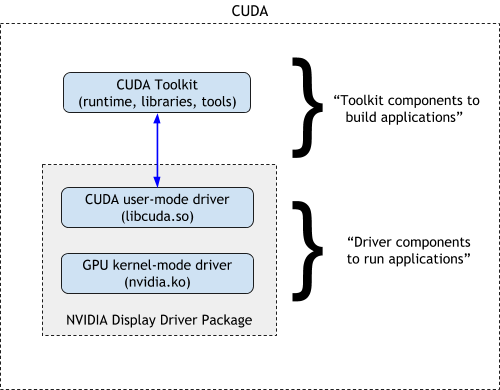

Typically, upgrading a CUDA Toolkit involves upgrading both the toolkit and the driver to get the bleeding edge toolkit and driver capabilities. But this is not always required. CUDA Compatibility guarantees allow for upgrading only certain components and that will be the focus of the rest of this document. It can be seen that the upgrade to a new CUDA Toolkit can be simplified to not always require a full system upgrade.

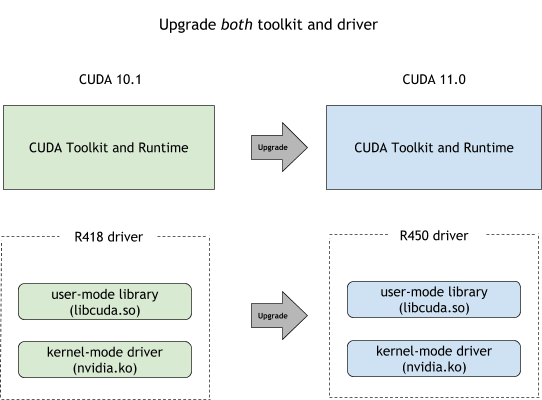

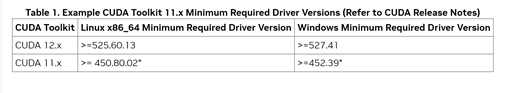

## Install cuda on Linux/Windows/WSL   
See cuda 12.4 instructions on this page: [page](https://developer.nvidia.com/cuda-downloads?target_os=Linux&target_arch=x86_64&Distribution=WSL-Ubuntu&target_version=2.0&target_type=runfile_local)

### nvidia-smi related
nvidia-smi   
nvidia-smi  -a   

## Which driver for which nvidia gpu card
1. Check page [here](https://www.nvidia.com/Download/index.aspx)       
2. cuda version and driver compatibility. Which cuda version for which gpu driver. See [here](https://docs.nvidia.com/cuda/cuda-toolkit-release-notes/index.html)    
3. For geforce gtx 1060 driver is 551 corresponding to cuda 12.4    
4. Install desired driver from [here](https://developer.nvidia.com/cuda-downloads?target_os=Windows&target_arch=x86_64&target_version=10&target_type=exe_local)


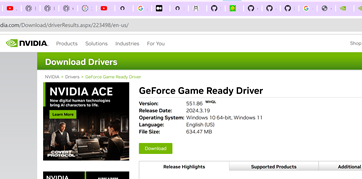

Latest Driver for GT730

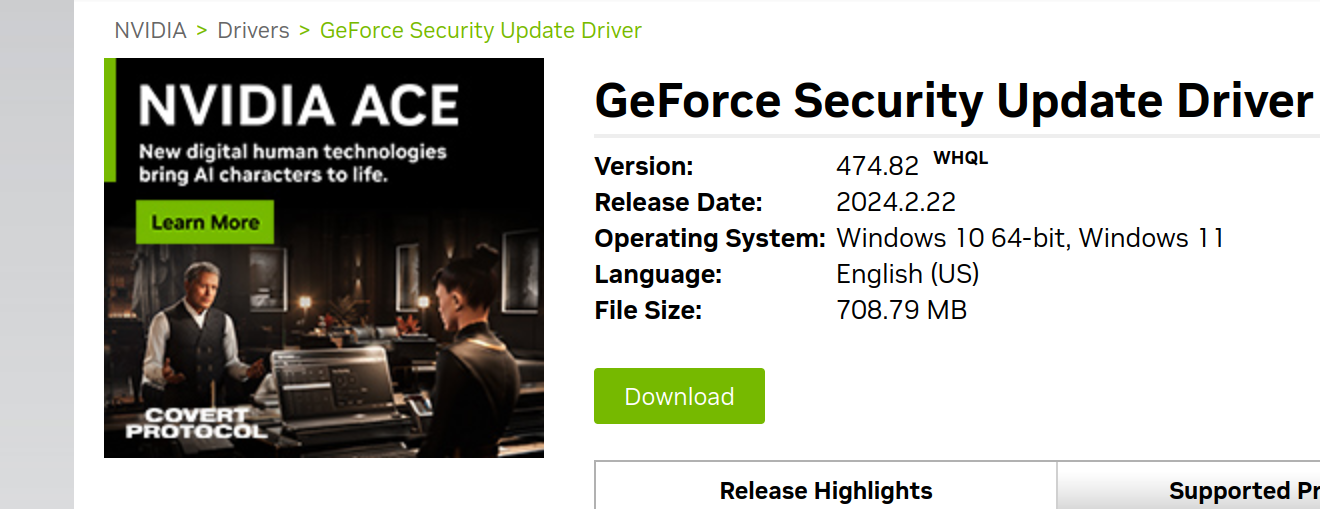

CUDA_HOME should be at "C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.8"    
See StackOverflow [here](https://stackoverflow.com/a/58890075)

## Install CUDA 11.4 on Ubuntu 22.04

Even though CUDA 11.4 is not available for Ubuntu 22.04 (but only for Ubuntu 20.0), I installed it. However, my driver was of a higher version, I downgraded it.    
Install CUDA 11.4 by following [this link](https://developer.nvidia.com/cuda-11-4-0-download-archive).

### Dealing with `nvidia-smi` error   

You may get communication error as follows:

` $ nvidia-smi`   

`NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.`

Refer [this blog](https://www.gpu-mart.com/blog/nvidia-smi-has-failed-because-it-couldnt-communicate-with-the-nvidia-driver) for solutions to above problem. The failure can occur if a wrong driver (may be a much higher version) is installed.

#### Solution 1:
> DKMS (Dynamic Kernel Module System) can automatically compile modules after kernel changes and adapt to new kernels. It allows discrete kernel modules to update without the need to modify the entire kernel. Use dkms to reinstall the appropriate driver for the kernel:   
>> `$ sudo apt install dkms`     
>> `$ sudo dkms install -m nvidia -v 470.182.03`     

>> `$ dkms status nvidia`     
nvidia/470.182.03, 5.15.0-88-generic, x86_64: installed`

**Note**: The 470.182.03 in the above command line is the version number of NVIDIA. When you are not aware of it, enter the/usr/src directory and you will see the nvidia folder with its suffix. Alternatively, use the following command to query it.

`$ ls /usr/src | grep nvidia`     
`nvidia-470.182.03`

When you input `nvidia smi` again, the familiar output will come back.

#### Solution 2
Else, install nvidia driver as follows. This helped me downgrade my driver from version 550 to version 470.  


Step 1: Before installing the driver, make sure to update the package repository. Run the following commands:

`$ sudo apt update`    
`$ sudo apt upgrade`

Step 2: Search for Nvidia drivers, run the following command. The output shows a list of available drivers for your GPU. You can also search for appropriate driver from this [page](https://www.nvidia.com/Download/index.aspx).    

And maybe, accordingly look for minumum CUDA version for this driver from this [page](https://docs.nvidia.com/cuda/cuda-toolkit-release-notes/index.html).

`$ apt search nvidia-driver`

Step 3: Choose a driver to install from the list of available GPU drivers. The best fit is the latest tested proprietary version.

`$ sudo apt install nvidia-driver-470`

Reboot machine after driver install and issue `$ nvidia-smi` command to see if you get output.

## Compare GPUs
See nvidia site [here](https://www.nvidia.com/en-us/studio/compare-gpus/)    
See wikipedia site on types of GPUs [here](https://en.wikipedia.org/wiki/Graphics_card#Specific_usage)    
See wikipedia for a [list of GPUs](https://en.wikipedia.org/wiki/List_of_Nvidia_graphics_processing_units#Desktop_GPUs)

## How to make a bootable ubuntu SSD drive   
See [YouTube Video](https://www.youtube.com/watch?v=MNVnO2aPB_c)     

It is better to use GParted to format SSD drive with `ext4` system. Better see Ubuntu installation methods that use Gparted than virtualbox.

**Install** driver from [here](https://developer.nvidia.com/cuda-downloads?target_os=Windows&target_arch=x86_64&target_version=10&target_type=exe_local)

ollama install on Linux
==========================
Problem solution:    
ollama install on ubuntu also installs many nvidia drivers. At times the driver selected may suddenly change screen resolution (when restarted). Then one has to try another nvidia driver. The driver selected must be compatible with cuda. See Stackoverflow [here](https://askubuntu.com/a/1449371)     
On my machine, the selected driver was: 470.239.06 (try with `nvidia-smi`)

## What is ROCm?   
See this [blog](https://www.electronicdesign.com/technologies/embedded/article/21254328/electronic-design-whats-the-difference-between-cuda-and-rocm-for-gpgpu-apps)     
How to install ROCm? See [here](https://rocm.docs.amd.com/projects/install-on-linux/en/latest/tutorial/quick-start.html)

### GPGPU Evolution    
(General purpose GPU as against (only) Gaming GPUs)

Early efforts to use GPUs as general-purpose processors required reformulating computational problems in terms of graphics primitives, which were supported by two major APIs for graphics processors: OpenGL and DirectX.

Those were followed shortly after by NVIDIA's CUDA, which enabled programmers to drop the underlying graphical concepts for more common high-performance computing concepts, such as OpenCL and other high-end frameworks. That meant modern GPGPU pipelines could leverage the speed of a GPU without requiring complete and explicit conversion of the data to a graphical form.

NVIDIA describes CUDA as a parallel computing platform and application programming interface (API) that allows the software to use specific GPUs for general-purpose processing. CUDA is a software layer that gives direct access to the GPU's virtual instruction set and parallel computational elements for executing compute kernels.    

### ROCm

Not to be left out, AMD launched its own general-purpose computing platform in 2016 dubbed Radeon Open Compute Ecosystem (ROCm). ROCm is primarily targeted at discrete professional GPUs, such as AMD's Radeon Pro line. However, official support is more expansive and extends to consumer-grade products, including gaming GPUs.

Unlike CUDA, the ROCm software stack can take advantage of several domains, such as general-purpose GPGPU, high-performance computing (HPC), and heterogeneous computing. It also offers several programming models, such as HIP (GPU-kernel-based programming), OpenMP/Message Passing Interface (MPI), and OpenCL. These also support microarchitectures, including RDNA and CDNA, for myriad applications ranging from AI and edge computing to the IoT/IIoT.      

AMD's ROCm software stack is similar to the CUDA platform, only it's open source and uses the company's GPUs to accelerate computational tasks. The latest cards in the Radeon Pro W6000 and RX6000 series come equipped with compute cores, ray accelerators (Ray tracing), and stream processors that take advantage of the RDNA architecture for parallel processing, including GPGPU, HPC, HIP (CUDA-like programming model), MPI, and OpenCL.

In [ ]:
########### DONE #############